In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_curve
from scipy.stats import gaussian_kde

In [347]:
bus_raw_data = pd.read_csv("analysis_data\\result_bus_20240226-112104.csv")
passenger_raw_data = pd.read_csv("analysis_data\\result_passenger_20240226-112405.csv")
taxi_raw_data = pd.read_csv("analysis_data\\result_taxi_20240226-112648.csv")
truck_raw_data = pd.read_csv("analysis_data\\result_truck_20240226-112812.csv")

bus_raw_data.drop(columns=['Unnamed: 0'], inplace=True)
passenger_raw_data.drop(columns=['Unnamed: 0'], inplace=True)
taxi_raw_data.drop(columns=['Unnamed: 0'], inplace=True)
truck_raw_data.drop(columns=['Unnamed: 0'], inplace=True)

In [348]:
bus_raw_data['driver_type'] = ['bus']*bus_raw_data.shape[0]
passenger_raw_data['driver_type'] = ['passenger']*passenger_raw_data.shape[0]
taxi_raw_data['driver_type'] = ['taxi']*taxi_raw_data.shape[0]
truck_raw_data['driver_type'] = ['truck']*truck_raw_data.shape[0]

In [349]:
raw_data = pd.concat([bus_raw_data, passenger_raw_data, taxi_raw_data, truck_raw_data], ignore_index=True)
raw_data['face_confidence'] = raw_data['face_confidence']/1000
raw_data.head()

,file_name,face_pt1_x_pos,face_pt1_y_pos,face_pt2_x_pos,face_pt2_y_pos,left_eye_pt1_x_pos,left_eye_pt1_y_pos,left_eye_pt2_x_pos,left_eye_pt2_y_pos,right_eye_pt1_x_pos,...,target_right_eye_pt2_x,target_right_eye_pt2_y_pos,exist_mask,exist_glasses,face_visible,left_eye_visible,left_eye_opened,right_eye_visible,right_eye_opened,driver_type
0,R_216_60_M_01_M0_G1_C0_01.jpg,248.0,705.0,508.0,1089.0,361.0,702.0,449.0,706.0,367.0,...,486.20,894.90,0,1,1,1,1,1,0,bus
1,R_216_60_M_01_M0_G1_C0_02.jpg,250.0,706.0,508.0,1091.0,369.0,701.0,420.0,705.0,366.0,...,480.53,889.18,0,1,1,1,1,1,1,bus
2,R_216_60_M_01_M0_G1_C0_03.jpg,236.0,717.0,503.0,1105.0,428.0,708.0,494.0,712.0,386.0,...,471.04,898.68,0,1,1,0,0,1,1,bus
3,R_216_60_M_01_M0_G1_C0_04.jpg,148.0,740.0,391.0,1125.0,258.0,710.0,294.0,711.0,246.0,...,343.75,896.78,0,1,1,1,0,1,1,bus
4,R_216_60_M_01_M0_G1_C0_05.jpg,241.0,735.0,494.0,1118.0,371.0,708.0,418.0,711.0,349.0,...,457.80,923.20,0,1,1,1,1,1,1,bus


In [357]:
len(raw_data[(raw_data['driver_type'] == 'bus')&(raw_data['exist_glasses'] == 1)])

3640

(0.0, 16000.0)

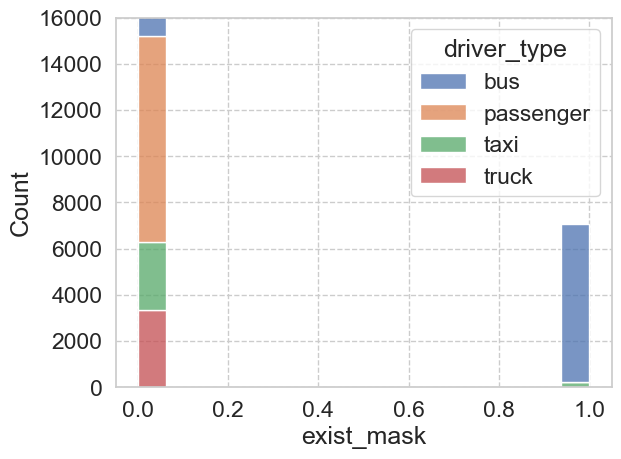

In [284]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=raw_data, x='exist_mask', hue='driver_type', multiple='stack')
plt.ylim(0, 16000)

<Axes: xlabel='exist_glasses', ylabel='Count'>

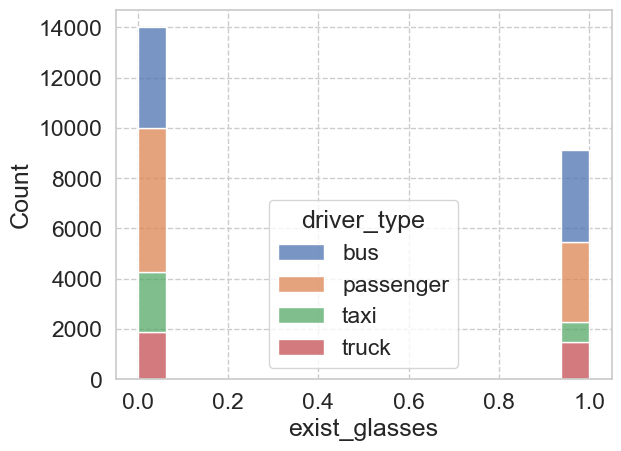

In [6]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=raw_data, x='exist_glasses', hue='driver_type', multiple='stack')

19

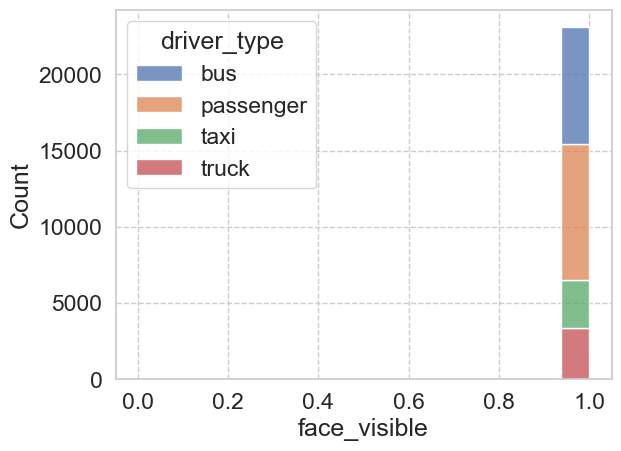

In [285]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=raw_data, x='face_visible', hue='driver_type', multiple='stack')
len(raw_data[raw_data['face_visible']==0])

(3315, 42)

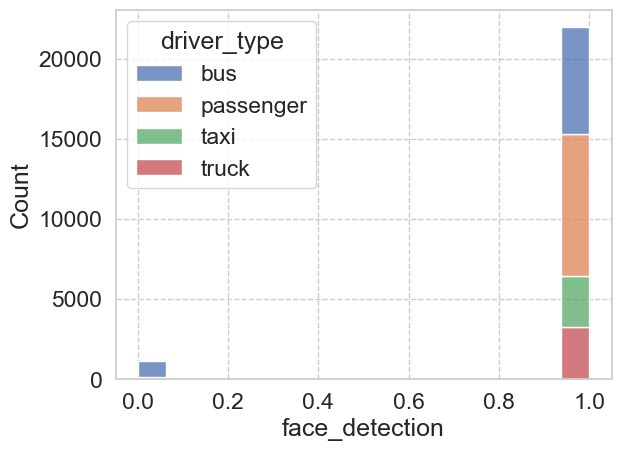

In [355]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=raw_data, x='face_detection', hue='driver_type', multiple='stack')

In [392]:
print(raw_data[(raw_data['exist_mask']==1) & (raw_data['exist_glasses']==1) & (raw_data['driver_type']=='truck')].shape)

print(raw_data[(raw_data['face_detection']==1) & (raw_data['exist_mask']==1) & (raw_data['exist_glasses']==1) & (raw_data['driver_type']=='truck')].shape)

(0, 42)
(0, 42)


Text(0.5, 0, 'Confidence')

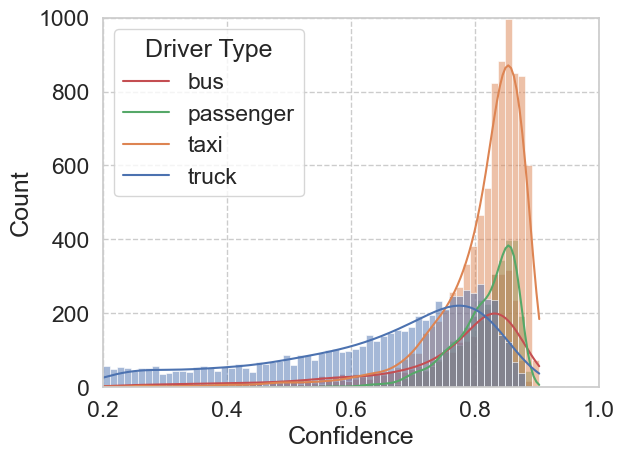

In [353]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=raw_data, x='face_confidence', hue='driver_type', kde='True')
plt.legend(title='Driver Type', labels=['bus', 'passenger', 'taxi', 'truck'])
plt.xlim(0.2, 1.0)
plt.ylim(0, 1000)
plt.xlabel('Confidence')

In [442]:
data = raw_data[raw_data['driver_type']=='truck']['face_confidence'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}')

중앙값: 0.802, 평균값: 0.7284081937799042, 최빈값: 0.8321761761761762


<Axes: >

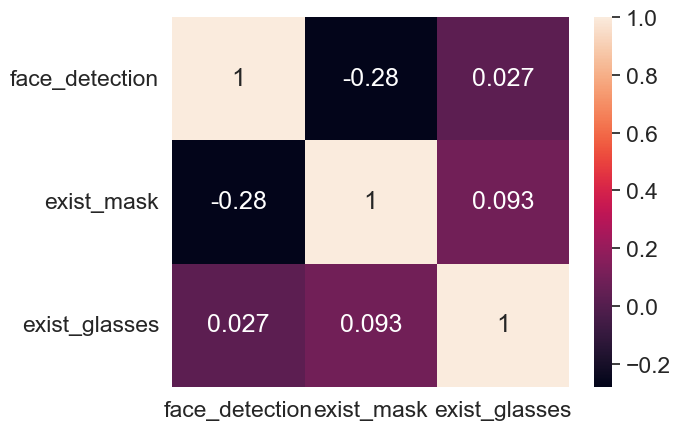

In [321]:
face_det_acc = raw_data[['face_detection', 'exist_mask', 'exist_glasses']]
sns.heatmap(face_det_acc.corr(), annot=True)

In [345]:
face_det_driver = pd.DataFrame()
face_det_driver['driver_type'] = (raw_data['driver_type'] == 'bus').astype(int)
face_det_driver['driver_type']

face_det_driver['driver_type'] = face_det_driver['driver_type']+(raw_data['driver_type']=='passenger').astype(int)
face_det_driver.describe()

,driver_type
count,23114.000000
mean,0.716882
std,0.450523
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [121]:
left_det = raw_data['left_eye_horizontal'].to_numpy()>0
right_det = raw_data['right_eye_horizontal'].to_numpy()>0
result_det = left_det * right_det
result_det = result_det.astype(np.uint8)

eye_det = pd.DataFrame()
eye_det['eye_det'] = result_det.astype(np.uint8)
eye_det['exist_mask'] = raw_data['exist_mask'].to_numpy()
eye_det['exist_glasses'] = raw_data['exist_glasses'].to_numpy()


eye_det.head()

,eye_det,exist_mask,exist_glasses
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


<Axes: >

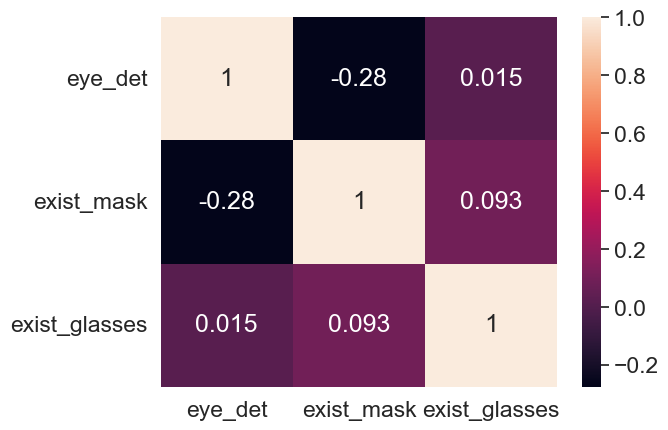

In [122]:
sns.heatmap(eye_det.corr(), annot=True)

In [125]:
eye_det['file_name'] = raw_data['file_name']
eye_det['driver_type'] = raw_data['driver_type']

In [197]:
left_eye_cm = confusion_matrix(y_true=(1-(raw_data['left_eye_opened'])*(raw_data['right_eye_opened'])), y_pred=raw_data['result_close'], normalize='true') 

Text(41.25, 0.5, 'Ground Truth')

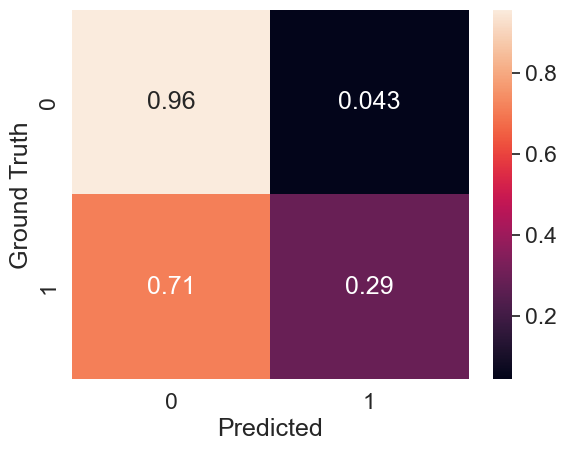

In [198]:
sns.heatmap(data=left_eye_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [520]:
extract_data = raw_data[raw_data['driver_type'] == 'truck'].copy()

acc_val = accuracy_score(y_true=(1-(extract_data['left_eye_opened'])*(extract_data['right_eye_opened'])), y_pred=extract_data['result_close'])
rec_val = recall_score(y_true=(1-(extract_data['left_eye_opened'])*(extract_data['right_eye_opened'])), y_pred=extract_data['result_close'])
f1_val =f1_score(y_true=(1-(extract_data['left_eye_opened'])*(extract_data['right_eye_opened'])), y_pred=extract_data['result_close'])

print(acc_val, rec_val, f1_val)

0.88127990430622 0.23933649289099526 0.33722871452420705


In [157]:
det_fail_eye = eye_det[eye_det['eye_det'] == 0].copy()
det_fail_eye.drop(columns=['eye_det'])

mask_1_glasses_1 = det_fail_eye[det_fail_eye['exist_mask']==1].copy()
mask_1_glasses_1 = mask_1_glasses_1[mask_1_glasses_1['exist_glasses']==1]
mask_1_glasses_1[mask_1_glasses_1['driver_type']=='truck']

,eye_det,exist_mask,exist_glasses,file_name,driver_type


In [158]:
mask_0_glasses_1 = det_fail_eye[det_fail_eye['exist_mask']==0].copy()
mask_0_glasses_1 = mask_0_glasses_1[mask_0_glasses_1['exist_glasses']==1]
mask_0_glasses_1[mask_0_glasses_1['driver_type']=='truck']

,eye_det,exist_mask,exist_glasses,file_name,driver_type
19776,0,0,1,R_614_20_M_01_M0_G1_C0_07.jpg,truck
19782,0,0,1,R_614_20_M_01_M0_G1_C0_13.jpg,truck
19787,0,0,1,R_614_20_M_01_M0_G1_C0_18.jpg,truck
19799,0,0,1,R_614_20_M_02_M0_G1_C0_10.jpg,truck
19800,0,0,1,R_614_20_M_02_M0_G1_C0_11.jpg,truck
19801,0,0,1,R_614_20_M_02_M0_G1_C0_12.jpg,truck
19819,0,0,1,R_614_20_M_03_M0_G1_C0_12.jpg,truck
19826,0,0,1,R_614_20_M_03_M0_G1_C0_19.jpg,truck
19865,0,0,1,R_614_20_M_05_M0_G1_C0_18.jpg,truck
19866,0,0,1,R_614_20_M_05_M0_G1_C0_19.jpg,truck


In [551]:
eye_det_driver = eye_det.copy()
eye_det_driver['driver_type'] = raw_data['driver_type']

eye_det_driver['left_eye_horizontal'] = raw_data['left_eye_pt2_x_pos']-raw_data['left_eye_pt1_x_pos']
eye_det_driver['left_eye_vertical'] = raw_data['left_eye_pt2_y_pos']-raw_data['left_eye_pt1_y_pos']
eye_det_driver['right_eye_horizontal'] = raw_data['right_eye_pt2_x_pos']-raw_data['right_eye_pt1_x_pos']
eye_det_driver['right_eye_vertical'] = raw_data['right_eye_pt2_y_pos']-raw_data['right_eye_pt1_y_pos']

eye_det_driver['left_eye_ratio'] = eye_det_driver['left_eye_vertical']/eye_det_driver['left_eye_horizontal']
eye_det_driver['right_eye_ratio'] = eye_det_driver['right_eye_vertical']/eye_det_driver['right_eye_horizontal']
eye_det_driver['closed_eye_label'] = 1-(raw_data['left_eye_opened']*raw_data['right_eye_opened'])

left_eye_dist = []
right_eye_dist = []

for pos in zip(raw_data['left_eye_pt2_x_pos'], raw_data['left_eye_pt2_y_pos']):
    left_eye_dist.append(distance.euclidean([pos[0]], [pos[1]]))

for pos in zip(raw_data['right_eye_pt2_x_pos'], raw_data['right_eye_pt2_y_pos']):
    right_eye_dist.append(distance.euclidean([pos[0]], [pos[1]]))
    
eye_det_driver['left_eye_distance'] = left_eye_dist
eye_det_driver['right_eye_distance'] = right_eye_dist
eye_det_driver['closed_eye_predict'] = raw_data['result_close']

eye_det_driver = eye_det_driver[eye_det_driver['left_eye_horizontal'] > 0]
eye_det_driver = eye_det_driver[eye_det_driver['left_eye_vertical'] > 0]
eye_det_driver = eye_det_driver[eye_det_driver['right_eye_horizontal'] > 0]
eye_det_driver = eye_det_driver[eye_det_driver['right_eye_vertical'] > 0]

eye_det_driver

,eye_det,exist_mask,exist_glasses,file_name,driver_type,left_eye_horizontal,left_eye_vertical,right_eye_horizontal,right_eye_vertical,left_eye_ratio,right_eye_ratio,closed_eye_label,left_eye_distance,right_eye_distance,closed_eye_predict
0,1,0,1,R_216_60_M_01_M0_G1_C0_01.jpg,bus,88.0,4.0,24.0,6.0,0.045455,0.250000,1,257.0,315.0,0
1,1,0,1,R_216_60_M_01_M0_G1_C0_02.jpg,bus,51.0,4.0,20.0,6.0,0.078431,0.300000,0,285.0,317.0,0
2,1,0,1,R_216_60_M_01_M0_G1_C0_03.jpg,bus,66.0,4.0,27.0,7.0,0.060606,0.259259,1,218.0,299.0,0
3,1,0,1,R_216_60_M_01_M0_G1_C0_04.jpg,bus,36.0,1.0,29.0,2.0,0.027778,0.068966,1,417.0,439.0,0
4,1,0,1,R_216_60_M_01_M0_G1_C0_05.jpg,bus,47.0,3.0,7.0,2.0,0.063830,0.285714,0,293.0,355.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23109,1,0,0,R_635_50_M_14_M0_G0_C0_16.jpg,truck,55.0,13.0,57.0,14.0,0.236364,0.245614,0,263.0,130.0,0
23110,1,0,0,R_635_50_M_14_M0_G0_C0_17.jpg,truck,45.0,15.0,27.0,16.0,0.333333,0.592593,1,24.0,33.0,0
23111,1,0,0,R_635_50_M_14_M0_G0_C0_18.jpg,truck,64.0,23.0,53.0,25.0,0.359375,0.471698,0,86.0,25.0,0
23112,1,0,0,R_635_50_M_14_M0_G0_C0_19.jpg,truck,61.0,15.0,57.0,14.0,0.245902,0.245614,0,149.0,1.0,0


(0.0, 20000.0)

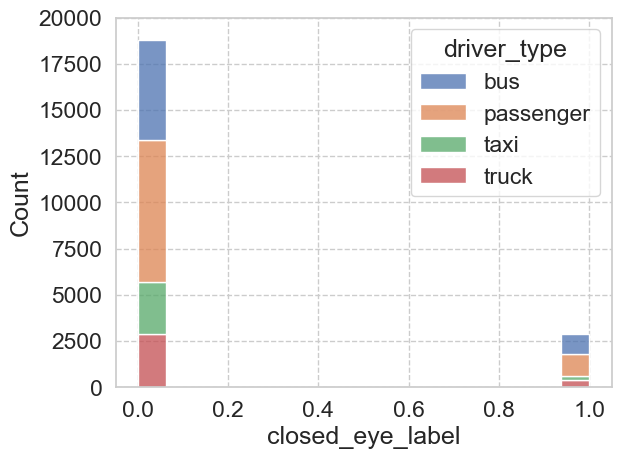

In [488]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=eye_det_driver, x='closed_eye_label', hue='driver_type', multiple='stack')
plt.ylim(0, 20000)

(0.0, 20000.0)

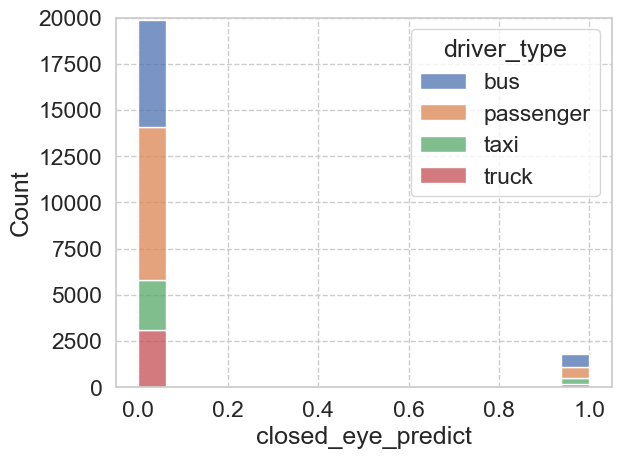

In [489]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=eye_det_driver, x='closed_eye_predict', hue='driver_type', multiple='stack')
plt.ylim(0, 20000)

In [516]:
print(eye_det_driver[(eye_det_driver['driver_type']=='truck') & (eye_det_driver['closed_eye_label']==0)].shape[0])
print(eye_det_driver[(eye_det_driver['driver_type']=='truck') & (eye_det_driver['closed_eye_predict']==0)].shape[0])


2871
3075


In [476]:
face_bbox = pd.DataFrame()
face_bbox['horizontal'] = raw_data['face_pt2_x_pos']-raw_data['face_pt1_x_pos']
face_bbox['vertical'] = raw_data['face_pt2_y_pos']-raw_data['face_pt1_y_pos']
face_bbox['area'] = face_bbox['horizontal']*face_bbox['vertical']
face_bbox['driver_type'] = raw_data['driver_type']

dist = []

for pos in zip(raw_data['face_pt2_x_pos'], raw_data['face_pt2_y_pos']):
    dist.append(distance.euclidean([pos[0]], [pos[1]]))

face_bbox['distance'] = dist

face_bbox

,horizontal,vertical,area,driver_type,distance
0,260.0,384.0,99840.0,bus,581.0
1,258.0,385.0,99330.0,bus,583.0
2,267.0,388.0,103596.0,bus,602.0
3,243.0,385.0,93555.0,bus,734.0
4,253.0,383.0,96899.0,bus,624.0
...,...,...,...,...,...
23109,321.0,452.0,145092.0,truck,377.0
23110,310.0,570.0,176700.0,truck,342.0
23111,340.0,559.0,190060.0,truck,274.0
23112,312.0,469.0,146328.0,truck,252.0


(0.0, 800.0)

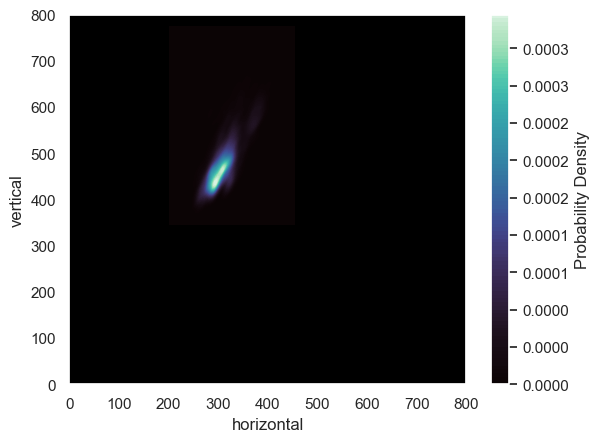

In [469]:
face_bbox_extract = face_bbox[(face_bbox['driver_type'] == 'passenger') & (face_bbox['horizontal'] > 0)].copy()

sns.set(font_scale=1.5)
sns.set_theme(style='dark')
sns.set_style({'axes.grid': False})

sns.kdeplot(data= face_bbox_extract, x='horizontal', y='vertical', thresh=0, levels=100, fill=True,
            cmap='mako', cbar=True, cbar_kws={'label': 'Probability Density', 'format': '%.4f'})
plt.gca().set_facecolor('black')
plt.xlim(0, 800)
plt.ylim(0, 800)

(0.0, 600.0)

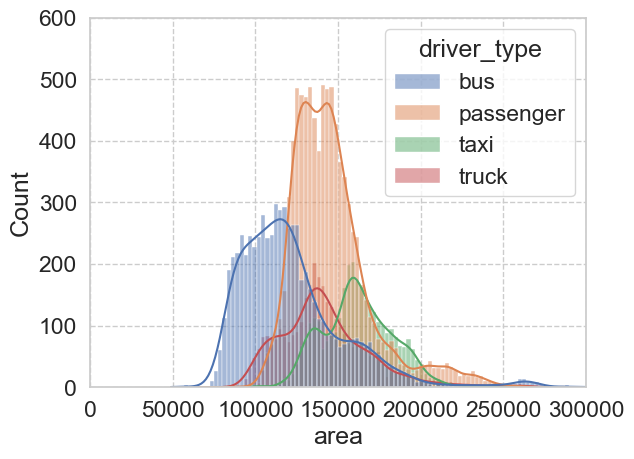

In [470]:
face_bbox_extract = face_bbox[face_bbox['horizontal'] > 0].copy()

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
hist = sns.histplot(data=face_bbox_extract, x='area', hue='driver_type', kde='True')
plt.xlim(0, 300000)
plt.ylim(0, 600)

In [461]:
data = face_bbox[(face_bbox['driver_type']=='bus') &(face_bbox['horizontal'] > 0)]['area'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}')

중앙값: 116066.0, 평균값: 122138.11499774808, 최빈값: 115147.61761761761


(0.0, 600.0)

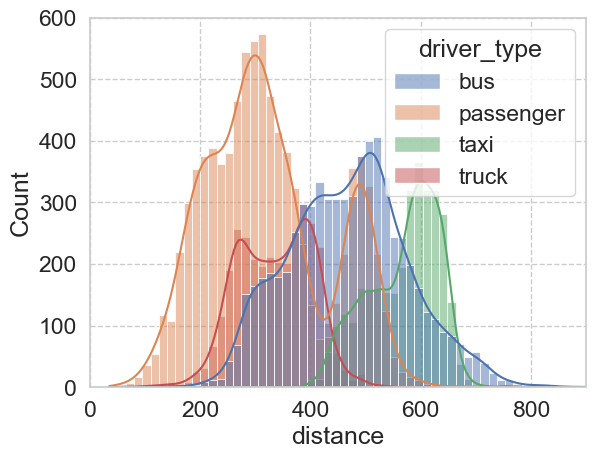

In [479]:
face_bbox_extract = face_bbox[face_bbox['horizontal'] > 0].copy()

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=face_bbox_extract, x='distance', hue='driver_type', kde='True')
plt.xlim(0, 900)
plt.ylim(0, 600)

In [484]:
data = face_bbox[(face_bbox['driver_type']=='truck') &(face_bbox['horizontal'] > 0)]['distance'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}, 표준편차: {np.std(data)}')

중앙값: 339.0, 평균값: 335.3690036900369, 최빈값: 390.5945945945946, 표준편차: 67.49809162163106


(0.0, 100.0)

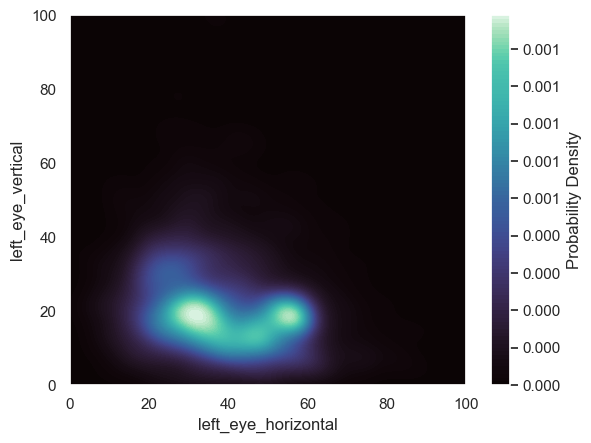

In [543]:
eye_bbox_extract = eye_det_driver[eye_det_driver['driver_type'] == 'bus'].copy()

sns.set(font_scale=1.5)
sns.set_theme(style='dark')
sns.set_style({'axes.grid': False})
sns.kdeplot(x=eye_bbox_extract['left_eye_horizontal'], y=eye_bbox_extract['left_eye_vertical'], 
            thresh=0, levels=100, fill=True, cmap='mako', cbar=True, cbar_kws={'label': 'Probability Density', 'format': '%.3f'})
plt.gca().set_facecolor('black')
plt.xlim(0, 100)
plt.ylim(0, 100)

In [547]:
data = eye_bbox_extract['left_eye_vertical'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}, 표준편차: {np.std(data)}')

중앙값: 19.0, 평균값: 20.58679969301612, 최빈값: 18.08008008008008, 표준편차: 11.589272203342272


In [557]:
eye_det_driver[eye_det_driver['left_eye_distance']>0].describe()

,eye_det,exist_mask,exist_glasses,left_eye_horizontal,left_eye_vertical,right_eye_horizontal,right_eye_vertical,left_eye_ratio,right_eye_ratio,closed_eye_label,left_eye_distance,right_eye_distance,closed_eye_predict
count,21673.0,21673.000000,21673.000000,21673.000000,21673.000000,21673.000000,21673.000000,21673.000000,21673.000000,21673.000000,21673.000000,21673.000000,21673.000000
mean,1.0,0.272551,0.396392,45.592904,19.355004,42.906796,22.422046,0.526153,0.643712,0.132930,259.137314,173.112905,0.082222
std,0.0,0.445282,0.489159,14.085968,10.154143,13.477330,12.348048,0.489203,0.541938,0.339507,105.976411,114.096687,0.274709
min,1.0,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,0.009174,0.014706,0.000000,1.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,34.000000,13.000000,31.000000,14.000000,0.260000,0.283019,0.000000,184.000000,69.000000,0.000000
50%,1.0,0.000000,0.000000,50.000000,17.000000,46.000000,19.000000,0.333333,0.377778,0.000000,258.000000,161.000000,0.000000
75%,1.0,1.000000,1.000000,56.000000,23.000000,54.000000,28.000000,0.656250,0.900000,0.000000,332.000000,275.000000,0.000000
max,1.0,1.000000,1.000000,123.000000,114.000000,92.000000,110.000000,12.000000,13.750000,1.000000,614.000000,551.000000,1.000000


(0.0, 1000.0)

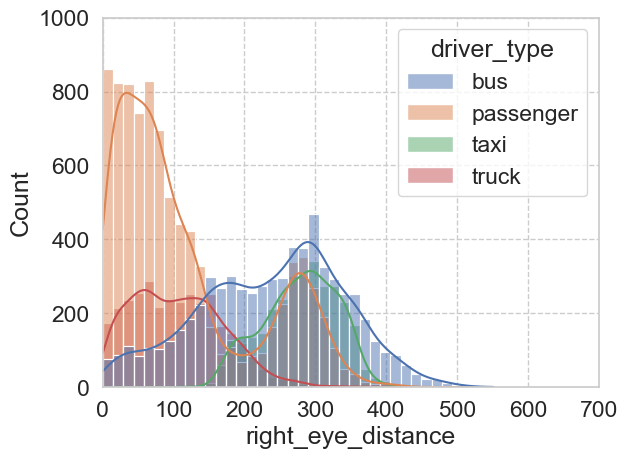

In [552]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(x=eye_det_driver['right_eye_distance'], hue=eye_det_driver['driver_type'], kde='True')
plt.xlim(0, 700)
plt.ylim(0, 1000)

(0.0, 1000.0)

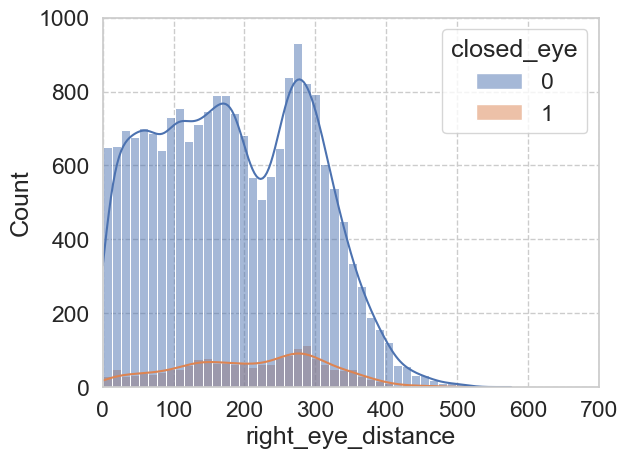

In [111]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=eye_det_driver, x='right_eye_distance', hue='closed_eye', kde='True')
plt.xlim(0, 700)
plt.ylim(0, 1000)

In [210]:
eye_det_driver

,exist_mask,exist_glasses,file_name,driver_type,left_eye_horizontal,left_eye_vertical,right_eye_horizontal,right_eye_vertical,left_eye_ratio,right_eye_ratio,left_eye_distance,right_eye_distance,closed_eye
0,0,1,R_216_60_M_01_M0_G1_C0_01.jpg,bus,88.0,4.0,24.0,6.0,0.034089,0.542326,341.0,333.0,0
1,0,1,R_216_60_M_01_M0_G1_C0_02.jpg,bus,51.0,4.0,20.0,6.0,0.070481,0.243252,332.0,331.0,0
2,0,1,R_216_60_M_01_M0_G1_C0_03.jpg,bus,66.0,4.0,27.0,7.0,0.042835,0.253010,280.0,319.0,0
3,0,1,R_216_60_M_01_M0_G1_C0_04.jpg,bus,36.0,1.0,29.0,2.0,0.202031,0.629317,452.0,466.0,0
4,0,1,R_216_60_M_01_M0_G1_C0_05.jpg,bus,47.0,3.0,7.0,2.0,0.047533,0.223607,337.0,360.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23109,0,0,R_635_50_M_14_M0_G0_C0_16.jpg,truck,55.0,13.0,57.0,14.0,0.199967,0.193303,305.0,173.0,0
23110,0,0,R_635_50_M_14_M0_G0_C0_17.jpg,truck,45.0,15.0,27.0,16.0,0.122927,0.282843,6.0,22.0,0
23111,0,0,R_635_50_M_14_M0_G0_C0_18.jpg,truck,64.0,23.0,53.0,25.0,0.330770,0.372497,127.0,3.0,0
23112,0,0,R_635_50_M_14_M0_G0_C0_19.jpg,truck,61.0,15.0,57.0,14.0,0.212658,0.210235,195.0,44.0,0


(0.0, 1.0)

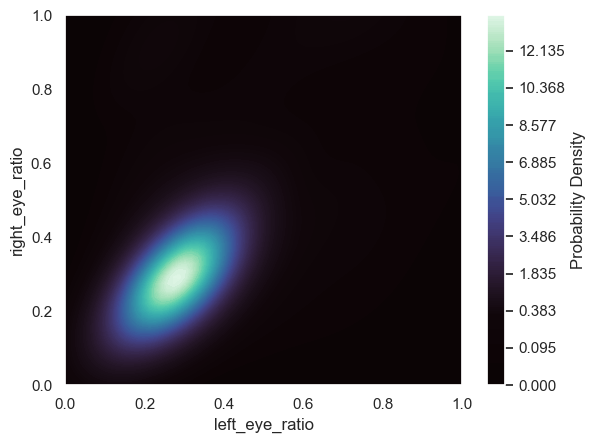

In [253]:
eye_ratio_extract = eye_det_driver[eye_det_driver['driver_type'] == 'truck'].copy()
eye_ratio_extract = eye_ratio_extract[eye_ratio_extract['closed_eye_label'] == 0]

sns.set(font_scale=1.5)
sns.set_theme(style='dark')
sns.set_style({'axes.grid': False})
sns.kdeplot(x=eye_ratio_extract['left_eye_ratio'], y=eye_ratio_extract['right_eye_ratio'], 
            thresh=0, levels=200, fill=True, cmap='mako', cbar=True, cbar_kws={'label': 'Probability Density', 'format': '%.3f'})
plt.gca().set_facecolor('black')
plt.xlim(0, 1)
plt.ylim(0, 1)